# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# base_url in farenheit
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&"

cloudiness = []
country = []
date = []
max_temp = []
humidity = []
lat = []
lng = []
wind_speed = []
city_name = []

# Loop through cities making the API call
i = 1
for city in cities:
    city=city
    query_url = base_url + "appid=" + weather_api_key + "&q=" + city
    response = requests.get(query_url).json()
    
    
    try:
        
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        max_temp.append(response["main"]['temp_max'])
        humidity.append(response["main"]['humidity'])
        lat.append(response["coord"]["lat"])  
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_name.append(response["name"])
        print(f"Processing record {i}|{city}")
        i+=1
        
    except (KeyError):
        print("City name not available.")

Processing record 1|wad madani
Processing record 2|mataura
Processing record 3|constitucion
Processing record 4|nikolskoye
Processing record 5|new norfolk
Processing record 6|hermanus
City name not available.
City name not available.
Processing record 7|nanortalik
Processing record 8|puerto ayora
Processing record 9|providencia
Processing record 10|villa carlos paz
Processing record 11|busselton
Processing record 12|rikitea
Processing record 13|ushuaia
Processing record 14|olafsvik
Processing record 15|port alfred
Processing record 16|vaini
Processing record 17|pucallpa
Processing record 18|bredasdorp
Processing record 19|hobart
Processing record 20|hilo
Processing record 21|cape town
Processing record 22|bluff
Processing record 23|skagen
Processing record 24|punta arenas
Processing record 25|san ramon
Processing record 26|kodiak
Processing record 27|kimbe
Processing record 28|portland
Processing record 29|yerbogachen
Processing record 30|eldorado
Processing record 31|hervey bay
City n

Processing record 249|tilichiki
Processing record 250|cayenne
Processing record 251|srednekolymsk
Processing record 252|bethel
Processing record 253|vardo
Processing record 254|meulaboh
Processing record 255|maniitsoq
Processing record 256|savantvadi
Processing record 257|san jose
Processing record 258|miraflores
Processing record 259|acapulco
Processing record 260|vila franca do campo
Processing record 261|geraldton
Processing record 262|touros
Processing record 263|hambantota
Processing record 264|slave lake
City name not available.
Processing record 265|minas
Processing record 266|palmerston
Processing record 267|deer lake
Processing record 268|redcliffe
Processing record 269|sahuaripa
City name not available.
Processing record 270|lata
Processing record 271|dargaville
Processing record 272|pochutla
Processing record 273|antalaha
Processing record 274|fortuna
City name not available.
Processing record 275|hay river
Processing record 276|vao
Processing record 277|chaozhou
Processing 

Processing record 497|narasannapeta
Processing record 498|nawa
Processing record 499|grafton
Processing record 500|bida
Processing record 501|narok
Processing record 502|nieves
Processing record 503|xiongzhou
City name not available.
Processing record 504|korla
Processing record 505|colonia
Processing record 506|magistralnyy


ReadTimeout: HTTPConnectionPool(host='api.openweathermap.org', port=80): Read timed out. (read timeout=None)

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
## build the city data into a csv

city_df = pd.DataFrame({"City": city_name, 
                        "Cloudiness": cloudiness, 
                        "Country": country, 
                        "Date": date, 
                        "Humidity":humidity,
                        "Lat": lat,
                        "Lng": lng,
                        "Max Temp": max_temp,
                        "Wind Speed": wind_speed
                                         })
city_df = city_df.rename_axis('City ID')

In [5]:
city_df.to_csv("city_list.csv")

city_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
City ID,,,,,,,,,
0,Wad Medani,71,SD,1597704601,71,14.40,33.52,81.21,10.78
1,Mataura,95,NZ,1597704601,97,-46.19,168.86,35.01,4.00
2,Constitución,6,CL,1597704601,80,-35.33,-72.42,48.96,11.59
3,Nikolskoye,1,RU,1597704602,93,59.70,30.79,53.60,4.47
4,New Norfolk,79,AU,1597704602,91,-42.78,147.06,48.00,2.17


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
humid_city = city_df.loc[city_df["Humidity"] > 100]
humid_city

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
City ID,,,,,,,,,


In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [ ]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [9]:
# format the date
import datetime
city_date = datetime.datetime.fromtimestamp(int(city_df["Date"][0])).strftime('%Y-%m-%d')


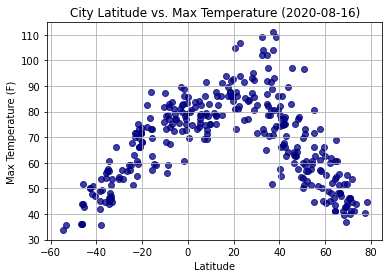

In [15]:
plt.scatter(city_df["Lat"], city_df["Max Temp"], marker = "o", color = "navy", alpha = .75)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs. Max Temperature ({city_date})")
plt.savefig("Latitude vs. Max Temp plot.png")
plt.show()

This plot is showing max temperature trends from the southpole to the equator to the north pole. Temperatures are low (cold) near the poles and high (hot) near the equator. 

## Latitude vs. Humidity Plot

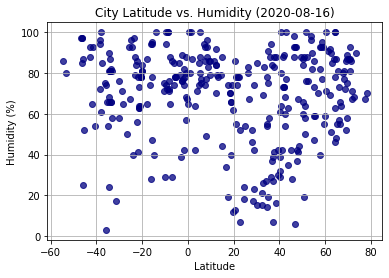

In [16]:
plt.scatter(city_df["Lat"], city_df["Humidity"], marker = "o", color = "navy", alpha = .75)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity ({city_date})")
plt.savefig("Latitude vs. Humidity plot.png")
plt.show()

This plot is showing humidity trends from the southpole to the equator to the north pole. I do not see a clear trend between humidity and proxiity to the equator.

## Latitude vs. Cloudiness Plot

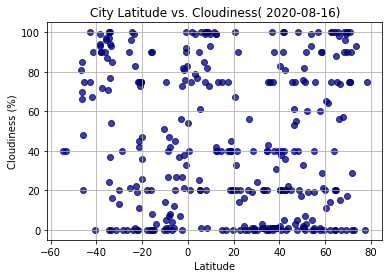

In [47]:
plt.scatter(city_df["Lat"], city_df["Cloudiness"], marker = "o", color = "navy", alpha = .75)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness( {city_date})")
plt.savefig("Latitude vs. Cloudiness plot.png")
plt.show()

This plot is showing cloudiness trends from the southpole to the equator to the north pole. I do not see a clear trend between location and cloudiness. 

## Latitude vs. Wind Speed Plot

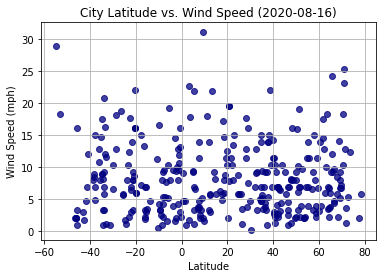

In [18]:
plt.scatter(city_df["Lat"], city_df["Wind Speed"], marker = "o", color = "navy", alpha = .75)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs. Wind Speed ({city_date})")
plt.savefig("Latitude vs. Wind Speed plot.png")
plt.show()

This plot is showing wind speed trends from the southpole to the equator to the north pole. It appears there aer some outliers near the equator. Potentially due to seasonality of bad weather (i.e. hurricanes). 

## Linear Regression

In [19]:
# OPTIONAL: Create a function to create Linear Regression plots

# Linear regression function
def linear_regression(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values, y_values)
    plt.plot(x_values,regress_values,"r-")
    return [line_eq, rvalue]

# Line annotation function
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

In [13]:
# Create Northern and Southern Hemisphere DataFrames

north = city_df.loc[city_df["Lat"] >= 0]
north_df = pd.DataFrame(north)

south = city_df.loc[city_df["Lat"] < 0]
south_df = pd.DataFrame(south)


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.5301190947260999


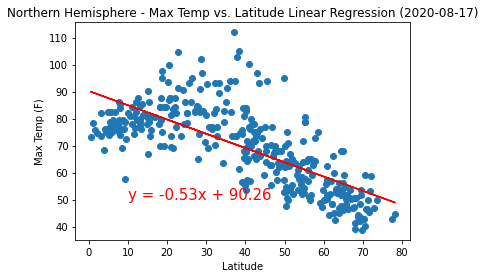

In [22]:
equation = linear_regression(north_df["Lat"], north_df["Max Temp"])

annotate(equation[0], 10, 50)

plt.title(f"Northern Hemisphere - Max Temp vs. Latitude Linear Regression ({city_date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")

print(f"The r-squared is : {equation[1]**2}")

plt.savefig("Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

Cities in the northern hemisphere have the highest temps near the equator and cool as you travel closer to the north pole. There is a strong linear relationship between temperature and proximity to the equator.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.6530820936570225


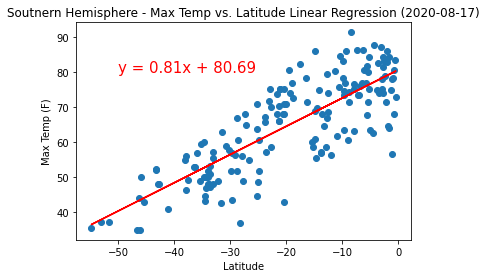

In [27]:
equation = linear_regression(south_df["Lat"], south_df["Max Temp"])
annotate(equation[0], -50, 80)

plt.title(f"Soutnern Hemisphere - Max Temp vs. Latitude Linear Regression ({city_date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")

print(f"The r-squared is : {equation[1]**2}")

plt.savefig("Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

Cities in the southern hemisphere have the highest temps near the equator and cool as you travel closer to the south pole. There is a strong linear relationship between temperature and proximity to the equator.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.0010725808907289629


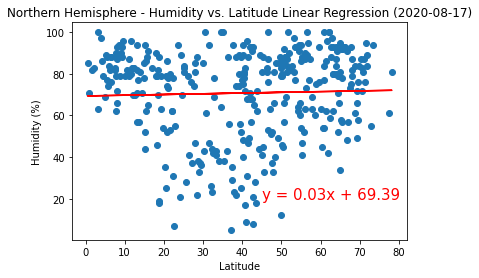

In [33]:
equation = linear_regression(north_df["Lat"], north_df["Humidity"])
annotate(equation[0], 45, 20)

plt.title(f"Northern Hemisphere - Humidity vs. Latitude Linear Regression ({city_date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

print(f"The r-squared is : {equation[1]**2}")

plt.savefig("Northern Hemisphere - Humidity vs. Latitude Linear Regression.png")

There is weak relationship between humidity and the location of cities in the northern hemisphere.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.01087021708259416


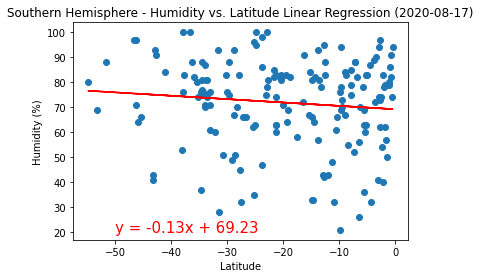

In [35]:
equation = linear_regression(south_df["Lat"], south_df["Humidity"])
annotate(equation[0], -50, 20)

plt.title(f"Southern Hemisphere - Humidity vs. Latitude Linear Regression ({city_date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

print(f"The r-squared is : {equation[1]**2}")

plt.savefig("Southern Hemisphere - Humidity vs. Latitude Linear Regression.png")

There is a weak relationship between humidity and the location of cities in the southern hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 6.014360206287683e-06


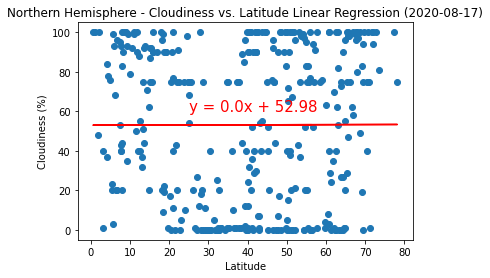

In [37]:
equation = linear_regression(north_df["Lat"], north_df["Cloudiness"])
annotate(equation[0], 25, 60)

plt.title(f"Northern Hemisphere - Cloudiness vs. Latitude Linear Regression ({city_date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

print(f"The r-squared is : {equation[1]**2}")

plt.savefig("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression.png")

There is a weak relationship between cloudiness and the location of cities in the northern hemisphere.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.03203508709191537


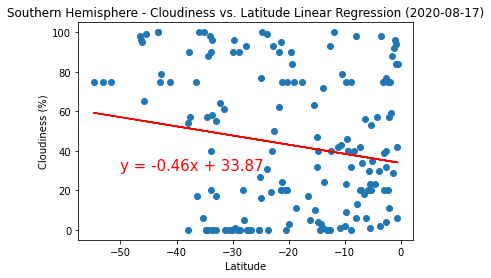

In [40]:
equation = linear_regression(south_df["Lat"], south_df["Cloudiness"])
annotate(equation[0], -50, 30)

plt.title(f"Southern Hemisphere - Cloudiness vs. Latitude Linear Regression ({city_date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

print(f"The r-squared is : {equation[1]**2}")

plt.savefig("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression.png")

There does not appear to be a strong relationship between cloudiness and city locations in the southern hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.0004157436072953162


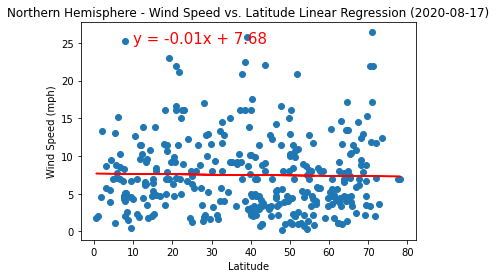

In [42]:
equation = linear_regression(north_df["Lat"], north_df["Wind Speed"])
annotate(equation[0], 10, 25)

plt.title(f"Northern Hemisphere - Wind Speed vs. Latitude Linear Regression ({city_date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

print(f"The r-squared is : {equation[1]**2}")

plt.savefig("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

There does not appear to be a clear trend between wind speed and the locations in the northern hemisphere. Wind speed appears to mostly be around 10mph. 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.06047914065602163


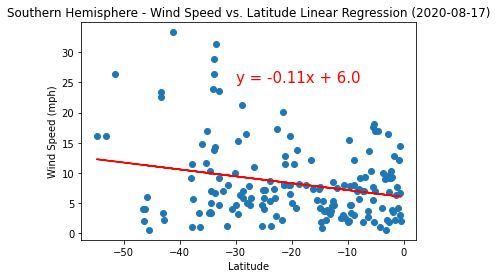

In [46]:
equation = linear_regression(south_df["Lat"], south_df["Wind Speed"])
annotate(equation[0], -30, 25)

plt.title(f"Southern Hemisphere - Wind Speed vs. Latitude Linear Regression ({city_date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

print(f"The r-squared is : {equation[1]**2}")

plt.savefig("Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

There does not appear to be a clear trend between wind speed and the location in the southern hemisphere. Locations closest to the south pole had extreme wind speed. 